In [10]:
import sys
sys.path.append('../../')

import numpy as np

from src.mechanism.cournot_pricing import CournotPricing
from src.game import Game
from src.strategy import Strategy

from src.learner.frank_wolfe import FrankWolfe
from src.learner.soma import SOMA
from src.learner.soda import SODA

**Setting**
create specific Cournot Pricing setting

In [11]:
# parameter demand (default: 1, 1)
slope = 1
intercept = 1

# parameter mechanism
bidder = ['1']*2
o_space = {'1': [0.0, slope/intercept]}
a_space = {'1': [0.0, slope/intercept]}

param_prior = {
    'distribution': 'uniform',
    #'corr': 0,
    }
'''
param_prior = {
    'distribution': 'gaussian',
    #'corr': 0, 
    'mu': 0.5, 
    'sigma': 0.1,
    }
'''

param_util = {
    'demand': 'linear', 
    'slope': slope, 
    'intercept': intercept,
}
                                                                  
# parameter approximation game
n = 64
m = 64

# create mechanism
mechanism = CournotPricing(bidder, o_space, a_space, param_prior, param_util)

# create approximation game
game = Game(mechanism, n, m)

if not mechanism.own_gradient:
    game.get_utility(mechanism)

**Learner**
Specify Learning Algorithm

In [12]:
# parameter learner
max_iter = int(1e4)
tol = 1e-6
stop_criterion = 'util_loss'
regularizer = 'euclidean'
steprule_bool = True

eta = 1
beta = 1/2

'''                                                                                                        
eta = 10  
beta = 1/20
'''

#learner = SODA(max_iter, tol, stop_criterion, regularizer, steprule_bool, eta, beta)
learner = SOMA(max_iter, tol, stop_criterion, regularizer, steprule_bool, eta, beta)
#learner = FrankWolfe(max_iter, tol, stop_criterion)

Run Learning Algorithm

In [13]:
#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')

# run soda
learner.run(mechanism, game, strategies, disable_tqdm_bool=False, print_result_bool=True, save_history_bool=True)

100%|████████████████████| 10.0k/10.0k [00:08<00:00, 1.18kit/s]

No convergence with stopping criterion
Current value of (util_loss): 0.00083
Best value of (util_loss)   : 0.00083)


In [14]:
len(strategies['1'].history), len(strategies['1'].utility)

(10000, 10000)

Visualization of the learning process and the final result - analytical BNE according to Lofaro (2002) / Ferreira & Ferreira (2010)

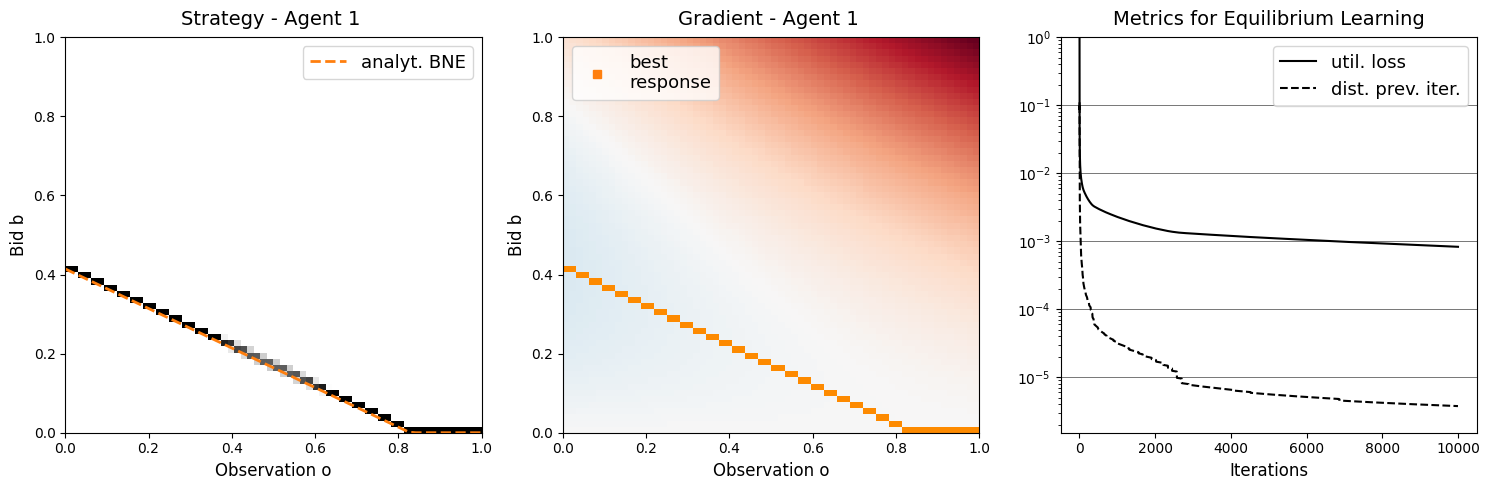

In [15]:
BNE_vfunc = np.vectorize(mechanism.BNE_func)

strategies['1'].plot(grad=True, metrics=True, beta=lambda x: BNE_vfunc(x))